# Part I - (Airline On-Time Performance Data)
## by (Johan Coetzer)

## Introduction

### **The dataset**

We will be using datasets which contain data about flights in the United States, including carriers, arrival and departure delays, and reasons for delays. There are multiple year's worth of data, ranging from 1987 up to 2008.
This dataset also contains many different variables/columns, we will need to explore these in order to make a decision on which ones we wish to keep. We will only work with year 2007 for this analysis since it has the most records between all the years.

### **About the features**

Read more about all of the various features asscoiated with flights here: https://www.transtats.bts.gov/Glossary.asp

> **Year**
- The year that the flight occured
- There is data for the years 1987-2008, so the year will be in this range

> **Month**
- The month in which the flight occured
- A value between 1 and 12, 1 being January and 12 indicating December

> **DayofMonth**
- The day of the month in which the flight occured
- A value between 1 and 31, 1 being the 1st day of the month and 31 (or 30) being the final day of the month.

> **DayOfWeek**
- The day of the week in which the flight occured
- A value between 1 and 7 where 1 indicating the flight took place on a Monday, and 7 indicating it took place on a Sunday.

> **DepTime**
- The actual departure time of the flight
- Has the format of hhmm (example: 1430 means 14:30) (local, hhmm)

> **CRSDepTime**
- Scheduled departure time.
- Format of hhmm

> **ArrTime**
- Actual arrival time
- Format of hhmm

> **CRSArrTime**
- Scheduled arrival time.
- Format of hhmm

> **UniqueCarrier**
- Unique carrier code
- "A numeric suffix is used to distinguish duplicate codes, for example, PA, PA (1), PA (2)." 
- "Use this field to perform analysis of data reported by one and only one carrier."

> **FlightNum**
- A one to four character alpha-numeric code for a particular flight. 

> **TailNum**
- Plane tail number

> **ActualElapsedTime**
- The time computed from gate departure time to gate arrival time.
- This is indicated in minutes

> **CRSElapsedTime**
- The amount of time the flights was scheduled to take.
- In minutes

> **AirTime**
- The airborne minutes of the aircraft, computed from the moment an aircraft leaves the ground until it touches the ground at the end of a flight stage.

> **ArrDelay**
- Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. 
- Time in minutes.
- **A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.** 

> **DepDelay**
- Departure delay is the difference between the scheduled departure time and the actual departure time from the origin airport gate.

> **Origin**
- Origin IATA airport code -> Starting point of a trip. 

> **Dest**
- Destination IATA airport code

> **Distance**
- The distance between origin and destination
- Measured in miles

> **TaxiIn**
- Taxi-In Time - The time elapsed between wheels down and arrival at the destination airport gate. 
- Measured in minutes.

> **TaxiOut**
- Taxi-Out Time -	The time elapsed between departure from the origin airport gate and wheels off.
- Measured in minutes.

> **Cancelled**
- Whether the flight was cancelled ore not.
- Value of 0 or 1 indicating false and true respectively.

> **CancellationCode**
- Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

> **Diverted**
- A flight that is required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.
- 1 = Yes, 0 = No

> **CarrierDelay**
- Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- In minutes

> **WeatherDelay**
- Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- In minutes

> **NASDelay**
- Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. [https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html]
- In minutes

> **SecurityDelay**
- Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- In minutes

> **LateAircraftDelay**
- This specific aircraft delay is a result of the late arrival of the previous flight that utilized the same plane that will be departing. This causes the current flight to take off late and creates a domino effect, causing passengers at other airports to board the aircraft much later as well. [https://www.sheffield.com/2019/different-flight-delays.html]
- In minutes

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from urllib.request import Request, urlopen  # Python 3
%matplotlib inline

### Gathering data

In order to load the datasets, we can import from the url. Some of the target urls are for compressed files with 'bz2' filetype, so we will need to first need to decompress these files before we can make use of them. We will then fetch our data and load them into pandas dataframes in order to make it easier to work with

We can create a list of url's in order to store the target links, which we will iterate through in order to get the data.

In [2]:
flight_urls = [
    'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/CCAZGT', #2004
    'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/JTFT25', #2005
    'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EPIFFT', #2006
    'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/2BHLWK', #2007
    'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA' #2008
]

Below are our import functions

In [3]:
# Function to retrieve and decompress the data into the dataframe
def getData_bz2(url):
    # Create a request
    req = Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    content = urlopen(req)
    # read the data into a dataframe using the compression as 'bz2'
    df = pd.read_csv(content, compression='bz2')
    return df

# This function is the same
def getData(url):
    req = Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    content = urlopen(req)
    df = pd.read_csv(content)
    return df


Now it is time to get our data using these functions. There are datasets for a lot of different years where each dataset contains a few million records. We will be working with the data frame year 2007, since we will not be interested in the differences between years yet, and will only be working with 1 year. 2007 was chosen instead of 2008 since there are more records in the 2007 dataset which might help in our analysis.

#### Flights

In [4]:
# Access the 2nd last url in the list wich will be the url for the year 2007
flights_df = getData_bz2(flight_urls[-2])

In [5]:
#flights_df.head(15).iloc[:,[14,15, 24, 25, 26, 27, 28]]

In [6]:
""" 
Use this function to get all of the data from all of the urls in the list
Note this takes very long since there are so many records

"""
# startYear = 2004
# dataframes= {}
# for url in flight_urls:
#     df = getData_bz2(url)
#     dataframes[startYear] = df
#     startYear = startYear + 1

' \nUse this function to get all of the data from all of the urls in the list\nNote this takes very long since there are so many records\n\n'

We can store the data in an excel sheet so we don't need to worry about importing the dataset each time, since it takes long.

In [7]:
flights_df.to_csv('flights.csv', index=False)

In [8]:
# Use the downloaded dataset instead
flights_df = pd.read_csv('flights.csv')

Since we are not yet sure which data we will need, we will import everything that is available to use

#### Airports

In [9]:
airport_url = 'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/XTPZZY'
airport_df = getData(airport_url)
airport_df.sample(5)

,iata,airport,city,state,country,lat,long
168,1L0,St. John the Baptist Parish,Reserve,LA,USA,30.087208,-90.582665
2710,PXE,Perry-Houston Couty,Perry,GA,USA,32.510583,-83.767333
2627,PIZ,Point Lay Dew Station,Point Lay,AK,USA,69.732875,-163.005342
2473,ODX,Evelyn Sharp,Ord,NE,USA,41.624250,-98.952361
3294,WJF,General Wm. J. Fox Airfield,Lancaster,CA,USA,34.740959,-118.218949


#### Carriers

In [10]:
carriers_df = getData('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/3NOQ6Q')
carriers_df.sample(5)

,Code,Description
1412,XAG,Ball Brothers Inc.
1108,RZZ,Aeromech Inc.
607,GU,Aviateca
1129,SCT,Skyline Airlines
457,E7,Estafeta Carga Aereas


#### Planes

In [11]:
plane_data_df = getData('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/XXSL8A')
plane_data_df.sample(5)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
395,N16502,Corporation,EMBRAER,11/01/2000,EMB-135ER,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
502,N17614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1584,N3BJAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4067,N822UA,Corporation,AIRBUS INDUSTRIE,02/02/1999,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
815,N261AT,Corporation,BOEING,06/02/2005,737-76N,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005


### Assessing & Cleaning

Before we start making changes, let's create a copy of the dataset

In [12]:
# Create a copy before we change anything
flights_df_copy = flights_df.copy()

#### Shape

Let's get a better understanding about the shape of our datasets

In [13]:
# Shape of Flights
flights_df.shape

(7453215, 29)

There are over 7 millions flights recorded in this dataset with 29 features. We will need to decide which features will be useful to us for this analysis

In [14]:
# Shape of Airports
airport_df.shape

(3376, 7)

In [15]:
# Shape of Carriers
carriers_df.shape

(1491, 2)

In [16]:
# Shape of Planes
plane_data_df.shape

(5029, 9)

#### Missing values

It is important to figure out which columns contain missing values so we can deal with them

In [17]:
# Count the missing values for each column
flights_df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

We can see that CancellationCode has almost all values missing for the column. This could mean that there just weren't values recorded, or it means that there was no value since there was no cancellation. Let's have a look:

In [18]:
# find out the amount of records in the dataset
flights_count = len(flights_df)

In [19]:
# find out how many flights were canelled
flights_cancelled_count = len(flights_df[flights_df['Cancelled'] == 1])

# find the value of flights who have a value for CancellationCode
len(flights_df[flights_df.CancellationCode.notnull()])

160749

In [20]:
flights_cancelled_count

160748

We can see that these values are about the same, meaning the values aren't missing, there just is not information to record since there are no cancellations. There will only be a cancellation code in case there was a cancellation,

The same goes for the other columns with null values, there isnt missing information, it was left blank intentionally.

#### Datatypes

In [21]:
flights_df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

We can see some issues with the datatypes which are as follow:
- DepTime, CRSDepTime, ArrTime, CRSArrTime
> These are times in the format of hh:mm. The datatype should be changed to datetime instead of integer or float.

- ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay are all times in minutes, and should be of integer type instead of float since the deciaml only contains 0 which gives no exra information.
> To fix this, we can use the astype() method to convert from float to int

- FlightNum should be a string/object type instead of an integer since we won't be performing any calculations with these values.
> To fix this issue, again we can use the astype() method to convert from an integer to a string

Let's start fixing these issues:

To fix the issue where the times are in the float format instead of a time, we can first fill all the empty values with some number that won't conflict with the actual times. For this we can use '9999' since it will eventually convert to 99:99 which is not a real time, so we will reomve all these occurences at the end. Then we will remove the decimal by converting the columns to integer. Finally we can apply pd.to_datetime on the columns with a format set to %H%M which will gives us the desired format. Finally we replace the occurences of the 99:99 with np.nan.


In [22]:
# Preview these columns and how the data looks
flights_df.head()[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']]

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,1232.0,1225,1341.0,1340
1,1918.0,1905,2043.0,2035
2,2206.0,2130,2334.0,2300
3,1230.0,1200,1356.0,1330
4,831.0,830,957.0,1000


Let's have a look at the DepTime

In [23]:
# Sort the values
flights_df.DepTime.sort_values()

3361982    1.0
2086038    1.0
7103326    1.0
7433047    1.0
6175133    1.0
3354387    1.0
660941     1.0
2382736    1.0
3354467    1.0
3986059    1.0
1920811    1.0
3600207    1.0
5542593    1.0
2805075    1.0
4621337    1.0
7150912    1.0
2541919    1.0
204221     1.0
4095913    1.0
2799895    1.0
3628947    1.0
1783735    1.0
3833276    1.0
6559328    1.0
5428276    1.0
7357200    1.0
5428283    1.0
5222166    1.0
7357185    1.0
3984568    1.0
          ... 
7451797    NaN
7451800    NaN
7451801    NaN
7451803    NaN
7451804    NaN
7451805    NaN
7451806    NaN
7451807    NaN
7451809    NaN
7451810    NaN
7451812    NaN
7451813    NaN
7451934    NaN
7452094    NaN
7452107    NaN
7452299    NaN
7452315    NaN
7452466    NaN
7452544    NaN
7452754    NaN
7452884    NaN
7452887    NaN
7453030    NaN
7453102    NaN
7453120    NaN
7453123    NaN
7453124    NaN
7453130    NaN
7453131    NaN
7453199    NaN
Name: DepTime, Length: 7453215, dtype: float64

There is a problem above, The minumum value is 1, which means 01:00, but it will not translate to a time since it needs to be 10 at the vary least. We can demonstrate this below

In [24]:
time = 1
time = pd.to_datetime(time, format='%H%M', errors='coerce')
time

NaT

Above we can see that it translates to NaT, which is undefined. Let's try 10 

In [25]:
time = 10
time = pd.to_datetime(time, format='%H%M', errors='coerce')
time

Timestamp('1900-01-01 01:00:00')

In [26]:
test = flights_df.loc[flights_df.DepTime < 10].head()
test.DepTime = test.DepTime.astype(int)
test.DepTime = test.DepTime * 10
pd.to_datetime(test.DepTime, format='%H%M').dt.time

11160     06:00:00
13002     04:00:00
118580    02:00:00
127187    07:00:00
129434    06:00:00
Name: DepTime, dtype: object

We can see that '10' will give us the desired time This means we need to change all values which are '<10' and append a 0. To do this with integers, we can multiply by 10.

In [27]:
#flights_df.apply(lambda row: row['DepTime'] if row['DepTime'] < 10 else 11, axis=1)
mask = (flights_df['DepTime'] <10)
vals = flights_df.loc[mask]['DepTime'] * 10
vals

11160      60.0
13002      40.0
118580     20.0
127187     70.0
129434     60.0
129437     30.0
129444     80.0
129454     50.0
130293     50.0
130299     50.0
130306     50.0
131157     70.0
132004     50.0
132006     50.0
132013     30.0
132019     50.0
132172     10.0
133687     70.0
133700     80.0
133703     70.0
136998     30.0
138730     50.0
138825     30.0
140355     50.0
141363     80.0
142891     50.0
143882     30.0
144595     80.0
144609     40.0
144612     70.0
           ... 
7426396    10.0
7427322    90.0
7427776    10.0
7428819    90.0
7429069    10.0
7430051    50.0
7430767    10.0
7431995    40.0
7432532    50.0
7433047    10.0
7434576    50.0
7434667    20.0
7434961    30.0
7436480    60.0
7437250    10.0
7438864    60.0
7440162    20.0
7440412    30.0
7441446    60.0
7441752    60.0
7441896    70.0
7442117    10.0
7443124    70.0
7443933    20.0
7444289    10.0
7444467    50.0
7445573    50.0
7450769    70.0
7451522    20.0
7452260    30.0
Name: DepTime, Length: 4

In [28]:
flights_df.DepTime.sort_values()

3361982    1.0
2086038    1.0
7103326    1.0
7433047    1.0
6175133    1.0
3354387    1.0
660941     1.0
2382736    1.0
3354467    1.0
3986059    1.0
1920811    1.0
3600207    1.0
5542593    1.0
2805075    1.0
4621337    1.0
7150912    1.0
2541919    1.0
204221     1.0
4095913    1.0
2799895    1.0
3628947    1.0
1783735    1.0
3833276    1.0
6559328    1.0
5428276    1.0
7357200    1.0
5428283    1.0
5222166    1.0
7357185    1.0
3984568    1.0
          ... 
7451797    NaN
7451800    NaN
7451801    NaN
7451803    NaN
7451804    NaN
7451805    NaN
7451806    NaN
7451807    NaN
7451809    NaN
7451810    NaN
7451812    NaN
7451813    NaN
7451934    NaN
7452094    NaN
7452107    NaN
7452299    NaN
7452315    NaN
7452466    NaN
7452544    NaN
7452754    NaN
7452884    NaN
7452887    NaN
7453030    NaN
7453102    NaN
7453120    NaN
7453123    NaN
7453124    NaN
7453130    NaN
7453131    NaN
7453199    NaN
Name: DepTime, Length: 7453215, dtype: float64

In [29]:
# Function to convert from int and float to time

flights_df = flights_df_copy
# Change time fields from float and int to time
for field in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    flights_df[field] = flights_df[field].fillna(9999)
    if field == 'DepTime' or field == 'ArrTime' :# these are float and need to go to int first
        flights_df[field] = flights_df[field].astype('int64') # convert floats to integers to remove the trailiing 0
    flights_df.loc[flights_df[field] < 10, field] = 10 * flights_df.loc[flights_df[field] < 10][field]
    flights_df[field] = pd.to_datetime(flights_df[field], format='%H%M', errors='coerce')#.dt.time # change to time format
    flights_df[field] = flights_df[field].replace(9999, np.nan) # replace the 99:99 with null again

In [30]:
flights_df[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,1900-01-01 12:32:00,1900-01-01 12:25:00,1900-01-01 13:41:00,1900-01-01 13:40:00
1,1900-01-01 19:18:00,1900-01-01 19:05:00,1900-01-01 20:43:00,1900-01-01 20:35:00
2,1900-01-01 22:06:00,1900-01-01 21:30:00,1900-01-01 23:34:00,1900-01-01 23:00:00
3,1900-01-01 12:30:00,1900-01-01 12:00:00,1900-01-01 13:56:00,1900-01-01 13:30:00
4,1900-01-01 08:31:00,1900-01-01 08:30:00,1900-01-01 09:57:00,1900-01-01 10:00:00


Now we need to convert the variables which are in minutes, to be integers. We can again use the astype(int) method. Since there are missing values, we need to fill the missing values with a value in order for the change to work. We will use the fillna method for this. Since these are empty, it means they should all be 0. We can replace these with 0.

In [31]:
# fill the missing values with 0
flights_df.fillna({'ActualElapsedTime':0, 'CRSElapsedTime':0, 'AirTime':0, 'ArrDelay':0, 'DepDelay':0}, inplace=True)

In [32]:
# Preview the types
flights_df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay']].dtypes

ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
dtype: object

In [33]:
# Make sure these columns have no more empty values so we can proceed
flights_df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay']].isnull().sum()

ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
dtype: int64

We can see that these columns no longer have any missing values so we can now apply our type transformation

In [34]:
# Convert datatypes of times from float to int
flights_df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay']] = flights_df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay']].apply(lambda x: x.astype('int'))

In [35]:
flights_df[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay']].dtypes

ActualElapsedTime    int64
CRSElapsedTime       int64
AirTime              int64
ArrDelay             int64
DepDelay             int64
dtype: object

We can now see these columns are the correct type.

Let's have a look at how our datatypes are looking now.

In [36]:
flights_df.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime              datetime64[ns]
CRSDepTime           datetime64[ns]
ArrTime              datetime64[ns]
CRSArrTime           datetime64[ns]
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime             int64
CRSElapsedTime                int64
AirTime                       int64
ArrDelay                      int64
DepDelay                      int64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

We will make use of the hours field in the datetime, so let's create a new field out of the existing DepTime field for the hours unit

In [37]:
flights_df['DepTime_Hour'] = flights_df.DepTime.dt.hour
flights_df['DepTime_Hour'].head()

0    12.0
1    19.0
2    22.0
3    12.0
4     8.0
Name: DepTime_Hour, dtype: float64

Now we need to convert these to integer, to avoid error, we will temporarily fill with unused value

In [38]:

flights_df['DepTime_Hour'] = flights_df['DepTime_Hour'].fillna(9999.0)
flights_df['DepTime_Hour'] = flights_df['DepTime_Hour'].astype(int)
flights_df['DepTime_Hour'].head()

0    12
1    19
2    22
3    12
4     8
Name: DepTime_Hour, dtype: int64

In [39]:
# Replace all 9999 and 9999.0 with null again
#flights_df = flights_df.replace(9999, np.nan)
flights_df['DepTime_Hour']  = flights_df['DepTime_Hour'] .replace(9999, np.nan)

Before we start the visualization, let's store this in a new CSV which we will make use of in the next phase.

In [40]:
flights_df.to_csv('flights_cleaned.csv', index=False)

### What is the structure of your dataset?

> Our main dataframe - flights - has the sturcture of **7453215** records/rows and **29** variables/columns

### What is/are the main feature(s) of interest in your dataset?

> Most features will be used, with the main ones being the features with times and whether the flight is cancelled or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All features will contribute to the investigation of these features.

## Univariate Exploration


### Question

What is the ratio between flights that were cancelled and those that weren't?

In [41]:
# Let's see the infomration first
flights_df.Cancelled.value_counts().sort_values()

1     160748
0    7292467
Name: Cancelled, dtype: int64

We know 0 is False and 1 is true so we can create the labels

### Visualization

Text(0.5,1.2,'Was the flight cancelled?')

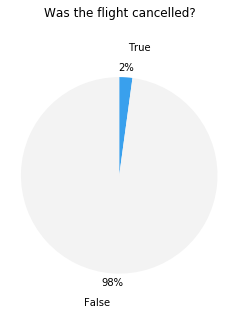

In [42]:
labels = ['True', 'False']

sorted_counts = flights_df.Cancelled.value_counts().sort_values()
plt.pie(sorted_counts, labels = labels, startangle = 90, counterclock = False, colors=['#39A0ED', '#f3f3f3'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3);
plt.axis('square');
plt.title('Was the flight cancelled?', y=1.2)

### Observation
We can see that only 2% of the flights listed were cancelled, meaning 98% of flights did have a lift off.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How long are Carrier Delays usually?

### Visualization

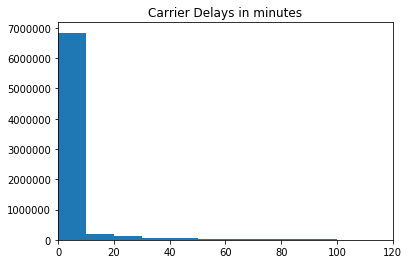

In [43]:
bins = np.arange(0, flights_df.CarrierDelay.max()+10, 10)
plt.hist(data = flights_df, x = 'CarrierDelay', bins = bins);
plt.xlim(xmin=0, xmax = 120)
plt.title('Carrier Delays in minutes');

### Observation

We can see that the carrier delays are usually less than 10 minutes.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Which locations are the most common destination?

### Visualization

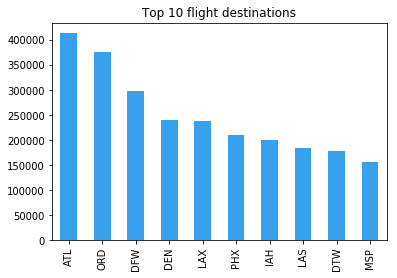

In [44]:
base_color = sb.color_palette()[0]
#fig, ax = plt.subplots(figsize=(10, 20))
type_order = flights_df['Dest'].value_counts().sort_values(ascending=False).index
flights_df['Dest'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='#39A0ED')
plt.title('Top 10 flight destinations');

### Observation

We can see the destinations that make up most of the flights are ATL, ORD and DFW

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Which day of the week had the most flights?

In [45]:
flights_df['DayOfWeek'].value_counts()

1    1112474
5    1101689
4    1097738
3    1088858
2    1078562
7    1040556
6     933338
Name: DayOfWeek, dtype: int64

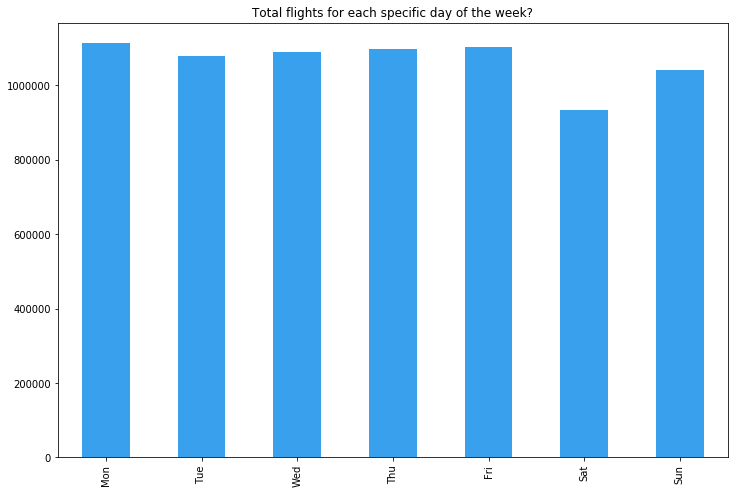

In [46]:
#counts = flights_df['DayOfWeek'].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots(figsize=(12, 8))
flights_df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', color='#39A0ED', ax=ax)
ax.set_xticklabels(days)
plt.title('Total flights for each specific day of the week?');

### Observation

We can see the most popular days of flight is on a Monday followed by Fridays. Saturdays are clearly the least popular days for flights.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How long do flights take?

### Visualization

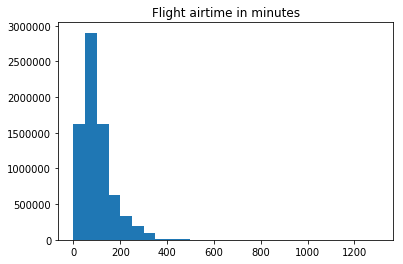

In [47]:
# Create bins with step-size 50
bins = np.arange(0, flights_df.AirTime.max()+50, 50)
plt.hist(data = flights_df, x = 'AirTime', bins = bins);
#plt.hist(data = flights_df, x = 'AirTime', bins = 100)
plt.title('Flight airtime in minutes');

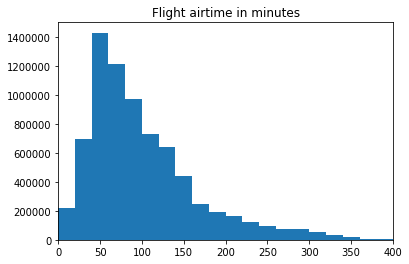

In [48]:
# Since most of our data is to the left, lets decrease the max x-limit to have a better view
# Let's also decrease our bin size to have a better idea of how our data is distributed.
bins = np.arange(0, flights_df.AirTime.max()+20, 20)
plt.hist(data = flights_df, x = 'AirTime', bins = bins);
plt.xlim(xmin=0, xmax = 400)
plt.title('Flight airtime in minutes');

### Observation

We can see that the flight-times are skewed to the right. Amount of flights with flight times for times <50 minutes are low, the peak amount of flight time reaches at about 50-70 minutes. It then drops when flight times are >70.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How is the flights distributed over the various months?

### Visualization

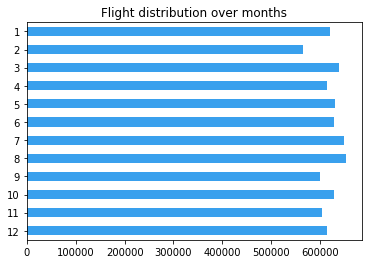

In [49]:
flights_df.Month.value_counts().sort_index( ascending=False).plot(kind='barh', color='#39A0ED')
plt.title('Flight distribution over months');

### Observation

We can see that the flights are relatively evenly distributed over the months , although month 7 and 8 (July and August) seem to be the most popular

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How does the distribution for departure times look?

### Visualization

In [50]:
flights_df.DepTime.head()

0   1900-01-01 12:32:00
1   1900-01-01 19:18:00
2   1900-01-01 22:06:00
3   1900-01-01 12:30:00
4   1900-01-01 08:31:00
Name: DepTime, dtype: datetime64[ns]

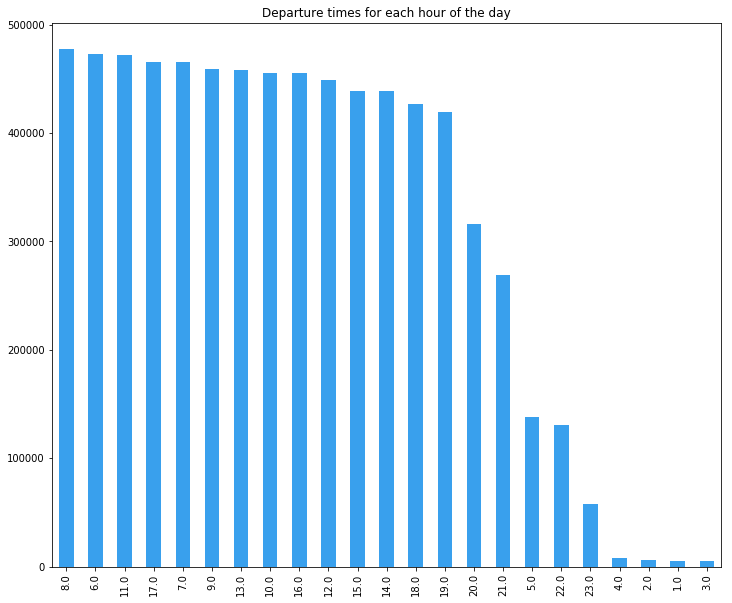

In [51]:
flights_df.DepTime_Hour.value_counts().plot(kind='bar', figsize=(12,10), color='#39A0ED')
plt.title('Departure times for each hour of the day');

### Observation

We can see that flights generally don't deperature in the early morning [00:00 - 04:00]. We also see that a lot of flights departure later mornings from 06:00. From 20:00 flights start decreasing again until early morning.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How much delays do flights have?

### Visualization

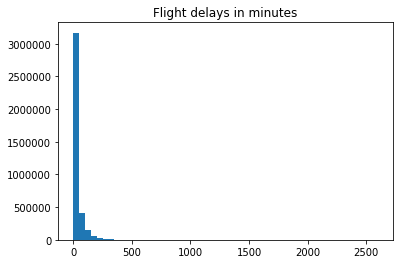

In [52]:
# Create bins
bins = np.arange(0, flights_df.ArrDelay.max()+50, 50)
plt.hist(data = flights_df, x = 'ArrDelay', bins = bins);
plt.title('Flight delays in minutes');

We can see there are small amounts of delays for more than 500 minutes, so lets limit it to get a better idea.

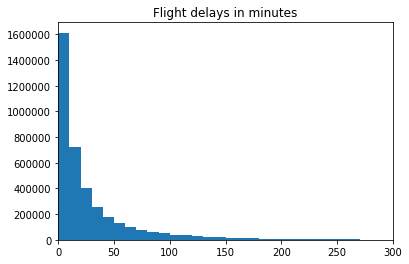

In [53]:
bins = np.arange(0, flights_df.ArrDelay.max()+10, 10)
plt.hist(data = flights_df, x = 'ArrDelay', bins = bins);
plt.xlim(xmin=0, xmax = 300)
plt.title('Flight delays in minutes');

### Observation

Most fights have a delay of < 10 minutes. For a flight to be late, it has to be >15 minutes, so we can observe that most flight are on time.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How many flights get diverted?

### Visualization

In [54]:
flights_df.Diverted.value_counts()

0    7436036
1      17179
Name: Diverted, dtype: int64

Text(0.5,1.2,'Was the flight diverted?')

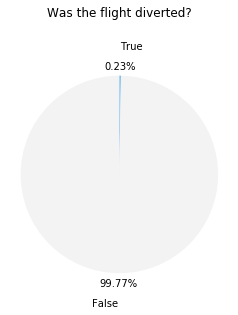

In [55]:
labels = ['True', 'False']

sorted_counts = flights_df.Diverted.value_counts().sort_values()
plt.pie(sorted_counts, labels = labels, startangle = 90, counterclock = False, colors=['#39A0ED', '#f3f3f3'], autopct='%.2f%%', pctdistance=1.1, labeldistance=1.3);
plt.axis('square');
plt.title('Was the flight diverted?', y=1.2)

### Observation

Cleary we can see that flights barely get diverted, with only 0.23% of flights recorded being divered.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the ArrDelay was skew to the right, and we saw that most flights has a delay of < 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> ArrDelay was very skewed to the right and most points were on the lower-end. I had to use x-lim to decrease the limit to get a better understanding of the data.

## Bivariate Exploration

### Question

Are there any correlation between two specific variables?

### Visualization

We can use a correlation heatmap to find out if there are nay specific correlations in the dataset

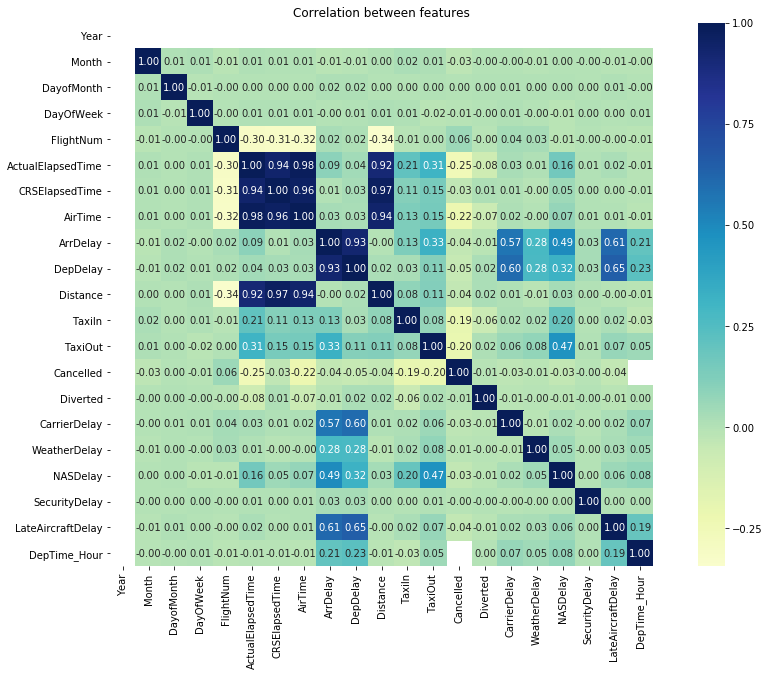

In [56]:
plt.figure(figsize=(16,10))
sb.heatmap(flights_df.corr(), square=True, annot=True, fmt='.2f', cmap='YlGnBu', center=.3);
plt.title('Correlation between features');
plt.show()

### Observation

We can see some strong correlations between:
- CRSElapsedTime and ActualElapsedTime
- CRSElapsedTime and AirTime
- AirTime and ActualElapsedTime
- Distance and (AirTime, CRSElapsedTime, ActualElapsedTime)
- ArrDelay and DepDelay

We can also see a positive correlation between
- CarrierDelay and ArrDelay
- CarrierDelay and DepDelay
- LateAircraftDelay and ArrDelay
- LateAircraftDelay and DepDelay

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How do the Departure times vary on different days of the week?

### Visualization

In [57]:
# Group the data to get the counts of times per each day of the week
counts = flights_df.groupby(['DayOfWeek', 'DepTime_Hour'], as_index=False).size()
# Rest from multi to single index
counts = counts.reset_index()

counts.head()

,DayOfWeek,DepTime_Hour,0
0,1,1.0,649
1,1,2.0,726
2,1,3.0,617
3,1,4.0,1111
4,1,5.0,20324


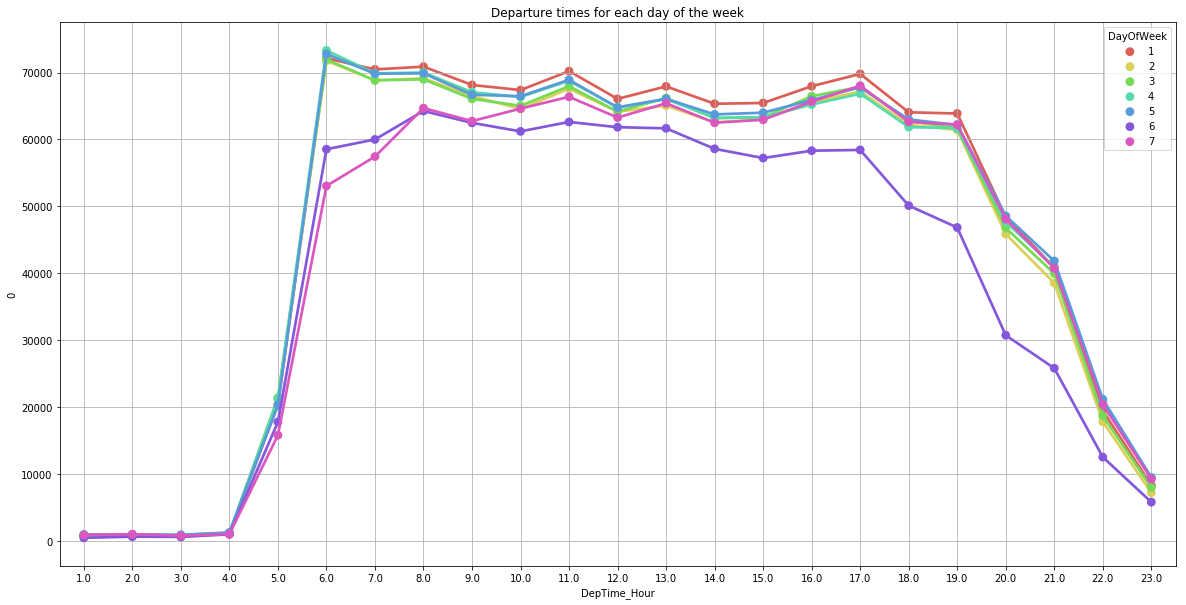

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(x= 'DepTime_Hour', y= 0, hue='DayOfWeek', data=counts,ax=ax, palette=sb.color_palette("hls", 7))
plt.title('Departure times for each day of the week');
plt.grid()

### Observation

We can see Saturdays have less flights for all hours.
Weekdays see more flights during 6am to 9am. Other than that the flights per hour per day seem consistent throughout the days of the week.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Which are the main cancellation codes throughout the week?

### Visualization

In [59]:
# Upgrade seaborn if it is outdated
#!pip install -U seaborn
#!pip install seaborn--upgrade

In [60]:
#fig, ax = plt.subplots(figsize=(12, 10))
#plt.bar(x="DayOfWeek", hue="CancellationCode", data=flights_df,stacked=True)
#sb.barplot(x="DayOfWeek", hue="CancellationCode", data=flights_df, stat="count", multiple="stack")
#sb.histplot(x="DayOfWeek", hue="CancellationCode", data=flights_df, stat="count", multiple="stack")


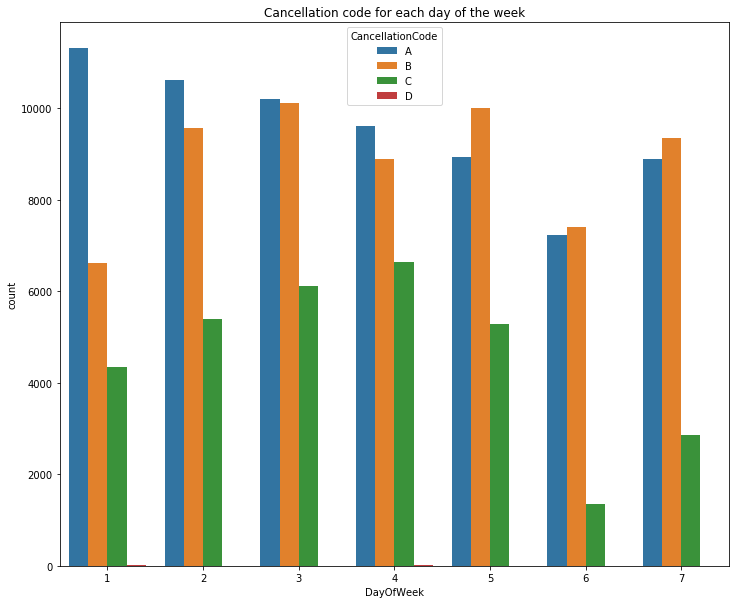

In [61]:
# Create the plot, set hue value to make it a clustered bar chart
fig, ax = plt.subplots(figsize=(12, 10))
sb.countplot(data=flights_df, x='DayOfWeek', hue='CancellationCode')
plt.title('Cancellation code for each day of the week');

### Observation

We can see barely any cancellations had a cancellationcode of D (secuity). Most of the time the cancellation code appear to be A (carrier) throughout the week, except Fidays and Sundays the main code is B (weather).

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Are there specific days of the week in which cancelation are more likely to occur?

### Visualization

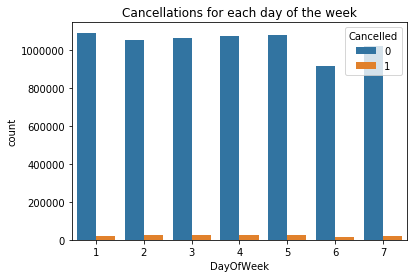

In [62]:
# Create the plot, set hue value to make it a clustered bar chart
sb.countplot(data=flights_df, x='DayOfWeek', hue='Cancelled')
plt.title('Cancellations for each day of the week');

This information does not look very useful, we can try a heatmap instead

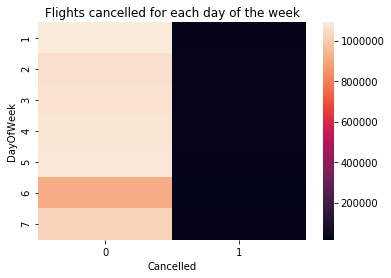

In [63]:
# Use group_by() and size() to get the number of cancellations per day of the week
ct_counts = flights_df.groupby(['DayOfWeek', 'Cancelled']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data
ct_counts = ct_counts.pivot(index = 'DayOfWeek', columns = 'Cancelled', values = 'count')

plt.title('Flights cancelled for each day of the week');

sb.heatmap(ct_counts);

### Observation

We can see Saturdays have the least amount of non-cancellations, while Mondays have the most. This is probably because Monday has a lot more flights than Mondays.

Our next question will show a more accurate result since we will use ratios

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

How do the ratios of cancellation differ between the various days?

Here we will need to make use of ratios, instead of counts.

In [64]:
count = flights_df.groupby(['DayOfWeek', 'Cancelled']).size()
count_counts = count.reset_index(name='count')
count_counts

,DayOfWeek,Cancelled,count
0,1,0,1090187
1,1,1,22287
2,2,0,1052983
3,2,1,25579
4,3,0,1062432
5,3,1,26426
6,4,0,1072592
7,4,1,25146
8,5,0,1077472
9,5,1,24217


In [65]:
count_counts.values[0][2]

1090187

In [66]:
i = 0
cancelled = []
while i < 14: # loop through the rows - each day has a cancelled 0 and 1, so 2 * 7 = 14
    # use values[i][2] to access the value of the count for each row
    value =  count_counts.values[i+1][2] / (count_counts.values[i][2] + count_counts.values[i+1][2])
    print(value)
    cancelled.append(value)
    i = i+2
print(cancelled)

0.0200337266309
0.0237158364563
0.0242694639705
0.0229071053384
0.0219817026402
0.0171320571969
0.0202805038845
[0.02003372663091452, 0.023715836456318692, 0.02426946397050855, 0.022907105338432304, 0.02198170264021879, 0.017132057196856874, 0.02028050388446177]


In [67]:
ratios = []
for index, cancel in enumerate(cancelled):
    ratios.append(
        {
            'DayOfWeek': index,
            'CancelledRatio': cancel,
        }
    )

cancellation_per_day_df = pd.DataFrame(ratios)
cancellation_per_day_df

,CancelledRatio,DayOfWeek
0,0.020034,0
1,0.023716,1
2,0.024269,2
3,0.022907,3
4,0.021982,4
5,0.017132,5
6,0.020281,6


We now have a dataframe with the ratios of the cancellations for each day of the week. Ratios are a better indicator to make predictions, since the totals of other days won't affect this.

### Visualization

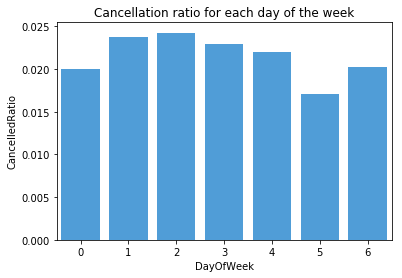

In [68]:
sb.barplot(x='DayOfWeek', y='CancelledRatio', data=cancellation_per_day_df, color='#39A0ED')
plt.title('Cancellation ratio for each day of the week');

### Observation

We can now see that the cancellation ratios look consistent throughout the days, although it appears that Fridays show the lowers cancellation ratios

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Are there certain destination cities that are home to more cancellations?

### Visualization

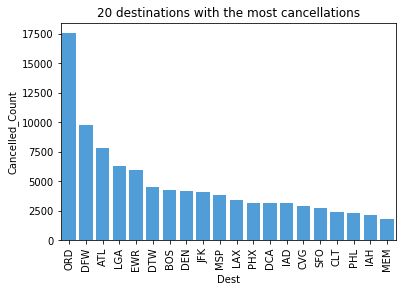

In [69]:
cancelled_df = flights_df[flights_df.Cancelled == 1]
cancelled_df = cancelled_df.groupby('Dest').size().reset_index(name = "Cancelled_Count").sort_values(by="Cancelled_Count", ascending=False)
cancelled_df = cancelled_df.head(20)  # get the top 20
sb.barplot(data=cancelled_df, x='Dest', y="Cancelled_Count", color='#39A0ED')
plt.xticks(rotation=90)
plt.title('20 destinations with the most cancellations');

### Observation

Clearly we can see that ORD has a lot more cancellation than any of the other Destination airports.

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Question

Are some months more prone to flight delays than others?

### Visualization

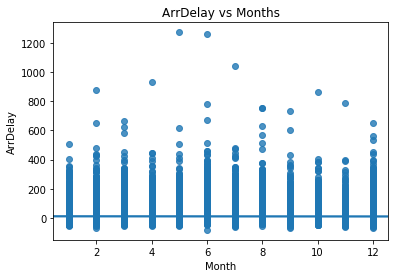

In [70]:
np.random.seed(2022)
sample = np.random.choice(flights_df.shape[0], 100000, replace=False, )
flights_subset = flights_df.loc[sample]

sb.regplot(data=flights_subset, y='ArrDelay', x='Month')
plt.title('ArrDelay vs Months');

### Observation

We can see that there is no real relationship between month and arrival delays

<p style="border-top: 3px solid black; padding-top: 30px;"></p>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Departure times throughout the week look consistent. We can see Saturdays have less flights for all hours.
Weekdays see more flights during 6am to 9am.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We saw that carrier and weather cancellation codes are the main cancellation codes for the flights. Distance and Airtime also had a strong positive correlation which makes sense since it take more time to cover more distance.

## Multivariate Exploration


### Question

How do the Departure Delays vary per month on different days of the week?

### Visualization

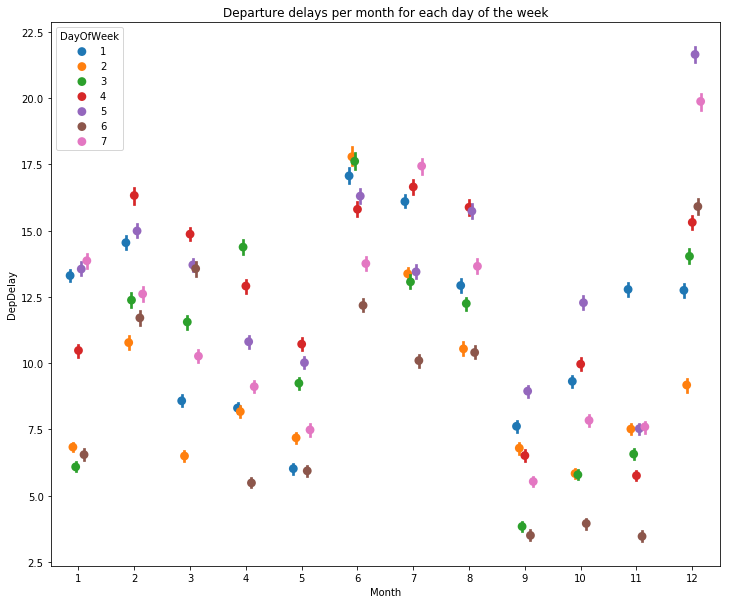

In [71]:
plt.figure(figsize=(12, 10))
sb.pointplot(data=flights_df, x='Month', y='DepDelay', hue='DayOfWeek', linestyles='', markers='o', dodge=0.3)
plt.title('Departure delays per month for each day of the week');
plt.show()

### Observation

We can see that Satudays have the lowest amount of Departure Delays in general over the months, although Wednesdays have the least amount of DepartureDelays in January and in December the dalys are a lot higher on Saturdays.

We can also see that December has the highest amount of Departure Delays, ecspeiclly on Fridays, Saturdays and Sundays
May, September, October and November has the least amount of Departure delays.

June, July and December appear to be the months with the most departure delays accross the days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It appeared that Departure time does differ on different days of the weeks for different months.

### Were there any interesting or surprising interactions between features?

> It is interesting that the departure times do indeed vary for different days of the weeks for the different months.

## Conclusions



We saw that there do exist various relationships throughout the dataset, and there is still plenty to explore, like relationships between the different variables for different years.